In [265]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import random
import pickle, os
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter
from matplotlib.pyplot import MultipleLocator

from scipy.interpolate import make_interp_spline
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d


plt.rcParams["figure.dpi"] = 120


COLORS = ['#8c96c6', '#44bb99', '#0297ba', '#B2DD5D', '#ffaabb', '#FDB777']
LINE_STYLES = [('^', '-'), ('s', '-'), ('o', '-'), 
               ('h', '-'), ('v', '-'), ('d', '-')]


def pet_save(pet_name):
    with open(pet_name + '.pickle', 'wb') as f:
        pickle.dump(pet_name, f, pickle.HIGHEST_PROTOCOL)

def pet_load(pet_name):
    with open(pet_name + '.pickle', 'rb') as f:
        return pickle.load(f)


MINIST

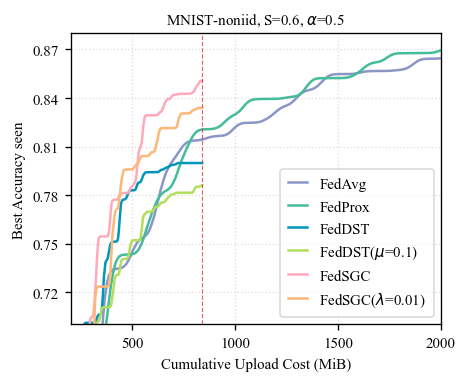

In [267]:
res = None

# [(x_fedavg, y_fedavg)         ,
# (x_fedprox, y_fedprox)         ,
# (x_feddst, y_feddst)           ,
# (x_feddst_prox, y_feddst_prox) ,
# (x_fedsgs, y_fedsgs)           ,
# (x_fedsgs_prox, y_fedsgs_prox) ] = pet_load('mnist_noniid_results')
res = pet_load('mnist_noniid_results')
labels = ['FedAvg', 'FedProx', 'FedDST', 
          'FedDST' +r'($\mu$=0.1)', 'FedSGC', 
          f'FedSGC'+r'($\lambda$=0.01)']


figure = plt.figure(figsize=(4, 3.3))
rows, cols = 1, 1
axes = figure.add_subplot(rows, cols, 1)



sigma = 2.5 # smooth factor
for color, ls, (x,y), label in zip(COLORS, LINE_STYLES, res, labels):
    ys = gaussian_filter1d(y, sigma=sigma)
    # ys[0] = y[0]
    
    axes.plot(x, ys, color=color, ls=ls[1], label=label)



axes.set_ylim(0.7, 0.88)
# axes.set_xlim(0.0, 2000)
axes.set_xlim(200, 2000)


split_x = res[2][0][-1] # x_feddst[-1]
axes.axvline(split_x, color='#d62728', lw=0.7, alpha=0.7, ls='--')


font = font_manager.FontProperties(family="Times New Roman",
                                   style='normal', size=9)
axes.set_xlabel("Cumulative Upload Cost (MiB)", font=font)
axes.set_ylabel("Best Accuracy seen", font=font)
axes.set_title(r'MNIST-noniid, S=0.6, $\alpha$=0.5',font=font)


legend_font = font_manager.FontProperties(family="Times New Roman",
                                style='normal', size=9)
axes.legend(
        loc='best',       
        handlelength =1.3,
        handleheight = 1,
        labelspacing=0.5, # add space between labels
        frameon=True,     # don't put a frame
        markerfirst=True,
        framealpha=0.7,
        ncol=1,
        borderpad=0.5,
        prop=legend_font,
        # bbox_to_anchor=(0.17, 0.08)
    )

for label in axes.get_xticklabels():
    label.set_fontproperties(legend_font)

for label in axes.get_yticklabels():
    label.set_fontproperties(legend_font)


axes.grid(ls=':', lw=0.8, alpha=0.4)
# axes.grid(ls=(0, (4, 7, 4, 7)), lw=0.3, alpha=0.8, which='minor', )
axes.yaxis.set_major_locator(MultipleLocator(0.03))

axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.show()
plt.savefig(os.path.join("./", "mnist-noniid.jpg"), format='jpg', dpi=600, bbox_inches='tight')

CIFAR-10

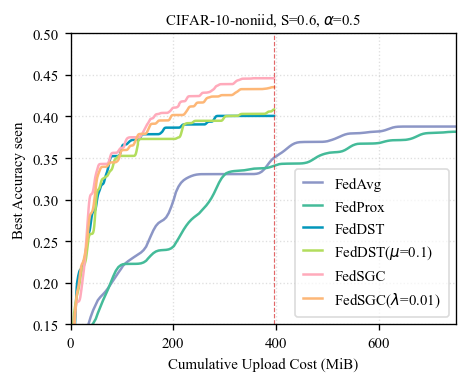

In [268]:
res = None

res = pet_load('cifar10_noniid_results')
labels = ['FedAvg', 'FedProx', 'FedDST', 
          'FedDST' +r'($\mu$=0.1)', 'FedSGC', 
          f'FedSGC'+r'($\lambda$=0.01)']


figure = plt.figure(figsize=(4, 3.3))
rows, cols = 1, 1
axes = figure.add_subplot(rows, cols, 1)



sigma = 2 # smooth factor
for color, ls, (x,y), label in zip(COLORS, LINE_STYLES, res, labels):
    ys = gaussian_filter1d(y, sigma=sigma)
    # ys[0] = y[0]    
    axes.plot(x, ys, color=color, ls=ls[1], label=label)



axes.set_ylim(0.15, 0.5)
axes.set_xlim(0, 750)


split_x = res[2][0][-1] # x_feddst[-1]
axes.axvline(split_x, color='#d62728', lw=0.7, alpha=0.7, ls='--')


font = font_manager.FontProperties(family="Times New Roman",
                                   style='normal', size=9)
axes.set_xlabel("Cumulative Upload Cost (MiB)", font=font)
axes.set_ylabel("Best Accuracy seen", font=font)
axes.set_title(r'CIFAR-10-noniid, S=0.6, $\alpha$=0.5',font=font)


legend_font = font_manager.FontProperties(family="Times New Roman",
                                style='normal', size=9)
axes.legend(
        loc='best',       
        handlelength =1.3,
        handleheight = 1,
        labelspacing=0.5, # add space between labels
        frameon=True,     # don't put a frame
        markerfirst=True,
        framealpha=0.7,
        ncol=1,
        borderpad=0.5,
        prop=legend_font,
        # bbox_to_anchor=(0.17, 0.08)
    )

for label in axes.get_xticklabels():
    label.set_fontproperties(legend_font)

for label in axes.get_yticklabels():
    label.set_fontproperties(legend_font)


axes.grid(ls=':', lw=0.8, alpha=0.4)
# axes.grid(ls=(0, (4, 7, 4, 7)), lw=0.3, alpha=0.8, which='minor', )
# axes.xaxis.set_minor_locator(MultipleLocator(250))

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join("./", "cifar10-noniid.jpg"), format='jpg', dpi=600, bbox_inches='tight')

PACS

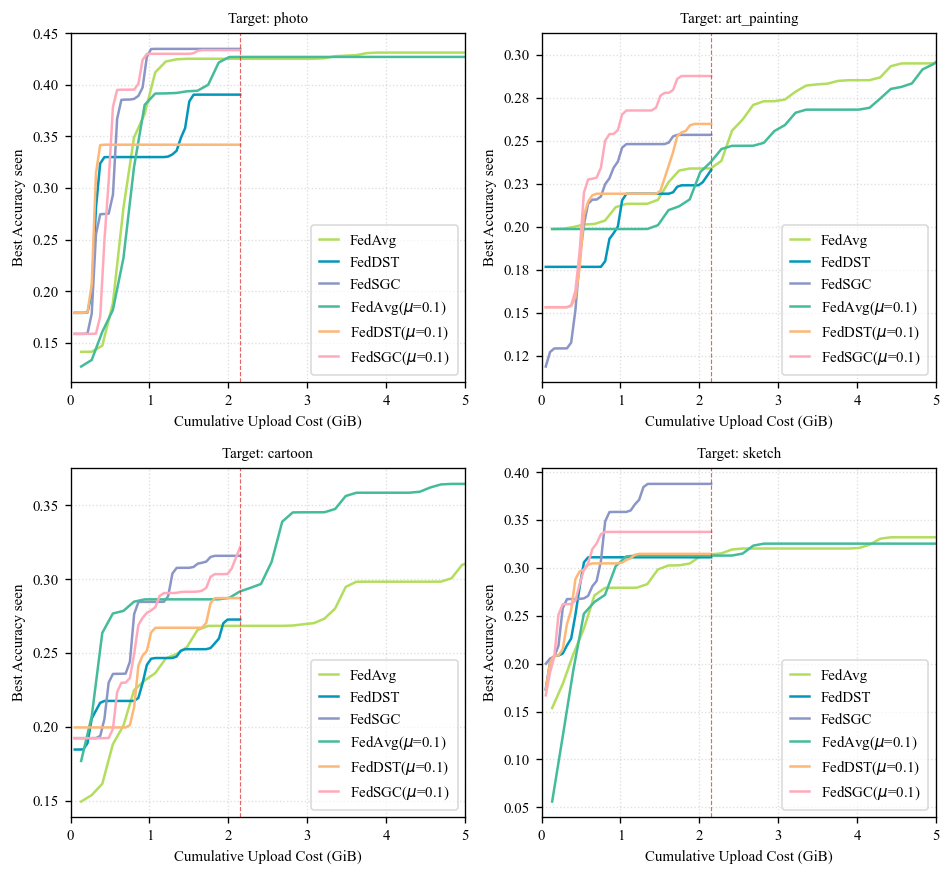

In [269]:
# COLORS = ['#8c96c6', '#6db2d9', '#44bb99', '#FDB777', '#0297BA', '#ffaabb']
COLORS = ['#B2DD5D', '#0297ba', '#8c96c6', '#44bb99', '#FDB777', '#ffaabb']


pacs_noniid_results= pet_load('pacs_noniid_results')
pacs_noniid_results_with_prox = pet_load('pacs_noniid_results_with_prox')

labels = ['FedAvg', 'FedDST', 'FedSGC', 
          'FedAvg' +r'($\mu$=0.1)', 
          'FedDST' +r'($\mu$=0.1)', 
          'FedSGC'+r'($\mu$=0.1)']


rows, cols = 2, 2
figure = plt.figure(figsize=(4*cols, 3.7*rows))

sigma = 0.6 # smooth factor

for idx,  target in enumerate(['photo', 'art_painting', 'cartoon', 'sketch']):
    axes = figure.add_subplot(rows, cols, idx+1)
    res1, res2 = pacs_noniid_results[target], pacs_noniid_results_with_prox[target]
    res = res1+res2
    
    for color, ls, (x,y), label in zip(COLORS, LINE_STYLES, res, labels):
        ys = gaussian_filter1d(y, sigma=sigma)
        axes.plot(x, ys, color=color, ls=ls[1], label=label)

    # axes.set_ylim(0.15, 0.5)
    axes.set_xlim(0, 5)


    split_x = res[2][0][-1] # x_feddst[-1]
    axes.axvline(split_x, color='#d62728', lw=0.7, alpha=0.7, ls='--')


    font = font_manager.FontProperties(family="Times New Roman",
                                    style='normal', size=9)
    axes.set_xlabel("Cumulative Upload Cost (GiB)", font=font)
    axes.set_ylabel("Best Accuracy seen", font=font)
    axes.set_title(f'Target: {target}',font=font)


    legend_font = font_manager.FontProperties(family="Times New Roman",
                                    style='normal', size=9)
    axes.legend(
            loc='best',       
            handlelength =1.3,
            handleheight = 1,
            labelspacing=0.5, # add space between labels
            frameon=True,     # don't put a frame
            markerfirst=True,
            framealpha=0.7,
            ncol=1,
            borderpad=0.5,
            prop=legend_font,
            # bbox_to_anchor=(0.17, 0.08)
        )

    for label in axes.get_xticklabels():
        label.set_fontproperties(legend_font)

    for label in axes.get_yticklabels():
        label.set_fontproperties(legend_font)

    axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axes.grid(ls=':', lw=0.8, alpha=0.4)
    # axes.grid(ls=(0, (4, 7, 4, 7)), lw=0.3, alpha=0.8, which='minor', )
    # axes.xaxis.set_minor_locator(MultipleLocator(250))

plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()
# plt.show()
plt.savefig(os.path.join("./", "pacs-sep.jpg"), format='jpg', dpi=600, bbox_inches='tight')

MNIST With Different Spasity Levels

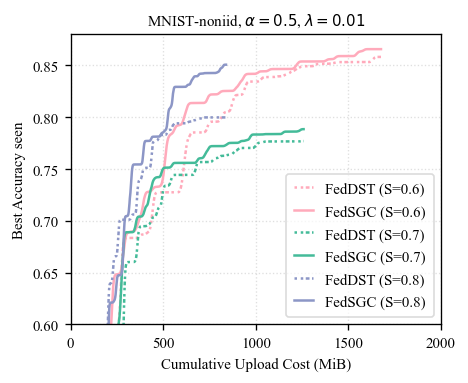

In [270]:
# [(x_feddst6, y_feddst6), (x_fedsgc6, y_fedsgc6), (x_feddst7, y_feddst7),  (x_fedsgc7, y_fedsgc7)] = pet_load('mnist_noniid_diff_s')
[(x_fedavg, y_fedavg)           ,
(x_fedprox, y_fedprox)         ,
(x_feddst, y_feddst)           ,
(x_feddst_prox, y_feddst_prox) ,
(x_fedsgc, y_fedsgc)           ,
(x_fedsgc_prox, y_fedsgc_prox) ] = pet_load('mnist_noniid_results')

res = pet_load('mnist_noniid_diff_s')
res += [(x_feddst, y_feddst), (x_fedsgc, y_fedsgc)]

labels = ['FedDST (S=0.6)', 'FedSGC (S=0.6)', 'FedDST (S=0.7)', 
          'FedSGC (S=0.7)', 'FedDST (S=0.8)', 'FedSGC (S=0.8)']

# '#8c96c6', '#44bb99', '#B2DD5D', 
COLORS = ['#ffaabb', '#ffaabb', 
          '#44bb99', '#44bb99', 
          '#8c96c6', '#8c96c6']

S_LINE_STYLES = [('^', (0, (1, 1.5, 1))), ('s', '-'), 
               ('o', (0, (1, 1.5, 1))), ('h', '-'), 
               ('v', (0, (1, 1.5, 1))), ('d', '-')]

figure = plt.figure(figsize=(4, 3.3))
rows, cols = 1, 1
axes = figure.add_subplot(rows, cols, 1)



sigma = 2 # smooth factor
for color, ls, (x,y), label in zip(COLORS, S_LINE_STYLES, res, labels):
    ys = gaussian_filter1d(y, sigma=sigma)
    # ys[0] = y[0]    
    axes.plot(x, ys, color=color, ls=ls[1], label=label)



axes.set_ylim(0.6, 0.88)
axes.set_xlim(0, 2000)


# split_x = res[2][0][-1] # x_feddst[-1]
# axes.axvline(split_x, color='#d62728', lw=0.7, alpha=0.7, ls='--')

# split_x = res[1][0][-1] # x_feddst[-1]
# axes.axvline(split_x, color='#d62728', lw=0.7, alpha=0.7, ls='--')

# split_x = res[-1][0][-1] # x_feddst[-1]
# axes.axvline(split_x, color='#d62728', lw=0.7, alpha=0.7, ls='--')

font = font_manager.FontProperties(family="Times New Roman",
                                   style='normal', size=9)
axes.set_xlabel("Cumulative Upload Cost (MiB)", font=font)
axes.set_ylabel("Best Accuracy seen", font=font)
axes.set_title(r'MNIST-noniid, $\alpha=0.5$, $\lambda=0.01$',font=font)


legend_font = font_manager.FontProperties(family="Times New Roman",
                                style='normal', size=9)
axes.legend(
        loc='best',       
        handlelength =1.3,
        handleheight = 1,
        labelspacing=0.5, # add space between labels
        frameon=True,     # don't put a frame
        markerfirst=True,
        framealpha=0.7,
        ncol=1,
        borderpad=0.5,
        prop=legend_font,
        # bbox_to_anchor=(0.17, 0.08)
    )

for label in axes.get_xticklabels():
    label.set_fontproperties(legend_font)

for label in axes.get_yticklabels():
    label.set_fontproperties(legend_font)


axes.grid(ls=':', lw=0.8, alpha=0.4)
# axes.grid(ls=(0, (4, 7, 4, 7)), lw=0.3, alpha=0.8, which='minor', )
# axes.xaxis.set_minor_locator(MultipleLocator(250))

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join("./", "mnist-s.jpg"), format='jpg', dpi=600, bbox_inches='tight')

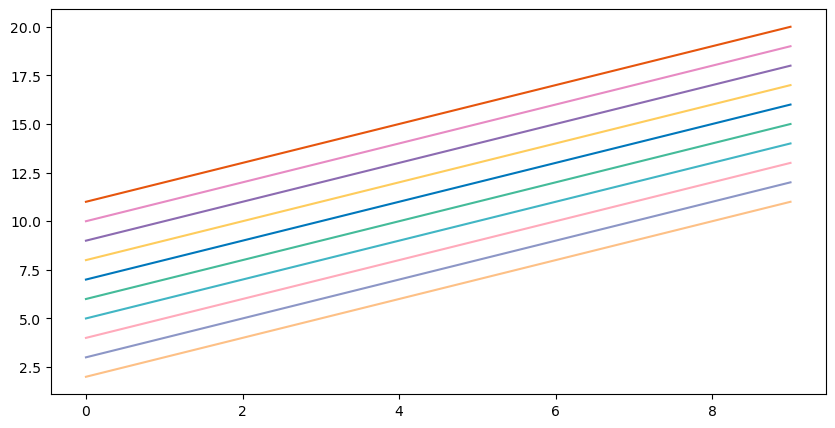

In [3]:
COLORS = ['#fdc086', '#8c96c6', '#FFAABB', '#41b6c4', '#44BB99', '#0077BB', '#fecc5c', '#8c6bb1', '#e78ac3', '#e6550d']

x = range(10)
y = np.linspace(1, 10, num=10)

plt.figure(figsize=(10, 5))
for i in range(len(COLORS)):
    plt.plot(x, y+i+1, color=COLORS[i], label=COLORS[i])